# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from pathlib import Path

from pprint import pprint   # TODO: Not needed after dev --> Delete when done

# `Citipy` determines cities based on latitude & longitude
from citipy import citipy   # Install using `pip install citipy`

# Personally written functions
# TODO: Add all function names or just run import statement
from gcs_fx import *

# Import OpenWeatherMap API Key
from api_keys import weather_api_key

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 100) # TODO: Change back `size = 1500`
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 100) # TODO: Change back `size = 1500`
lat_lngs = list(zip(lats, lngs))    # TODO: Correction to allow for later access of coordinates
                                    # --> Ensure is necessary later

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 73


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=4312e8b42443141d8193bff21246737e
# https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}
base_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# TODO: Define unit measurement system
units = 'metric'

# TODO: 'metric' or 'imperial' | kelvin is default -> Del unit query
# Celcius = Kelvin - 273.15
# Fahrenheit = (Kelvin - 273.15) x 9/5 + 32 | Includes conv. to Celcius

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1    # TODO: starter_code was `record_count = 0` --> Ensure is correct

    # Create endpoint URL with each city
    city_url = f'{base_url}&q={city}&units={units}'

    # Log the url, record, and set numbers
    # TODO: Clean old print-->"Processing Record %s of Set %s | %s" % (record_count, set_count, city)
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()

        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bargara
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | nadi
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | launceston
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | hays
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | chhatak
Processing Record 17 of Set 1 | hot springs national park
City not found. Skipping...
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set

In [39]:
# Convert the cities weather data into a Pandas DataFrame
cityData_df = pd.DataFrame(city_data)

# Show Record Count
cityData_df.count()

City          69
Lat           69
Lng           69
Max Temp      69
Humidity      69
Cloudiness    69
Wind Speed    69
Country       69
Date          69
dtype: int64

In [40]:
# Display sample data
cityData_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.52,71,81,8.32,TF,1735529814
1,grytviken,-54.2811,-36.5092,2.11,72,3,4.28,GS,1735529815
2,nadi,-17.8000,177.4167,31.00,58,20,6.69,FJ,1735529816
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,37,75,6.00,RU,1735529816
4,launceston,-41.4500,147.1667,18.80,72,100,9.26,AU,1735529817


In [41]:
# Export the City_Data into a csv
# NOTE: `df.to_csv()`` and other `.to_file()` methods takes OS independent regex
# However, `Path` objects are useful for checking directory requirements
outPath = Path('output_data')
if not outPath.exists():
    Path.mkdir('output_data')
    print(f'New directory {outPath.name} created.')
cityData_df.to_csv('output_data/cities.csv', index_label = 'City_ID')

New directory output_data created.


In [42]:
# Read saved data
cityData_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
cityData_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.52,71,81,8.32,TF,1735529814
1,grytviken,-54.2811,-36.5092,2.11,72,3,4.28,GS,1735529815
2,nadi,-17.8000,177.4167,31.00,58,20,6.69,FJ,1735529816
3,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,37,75,6.00,RU,1735529816
4,launceston,-41.4500,147.1667,18.80,72,100,9.26,AU,1735529817


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

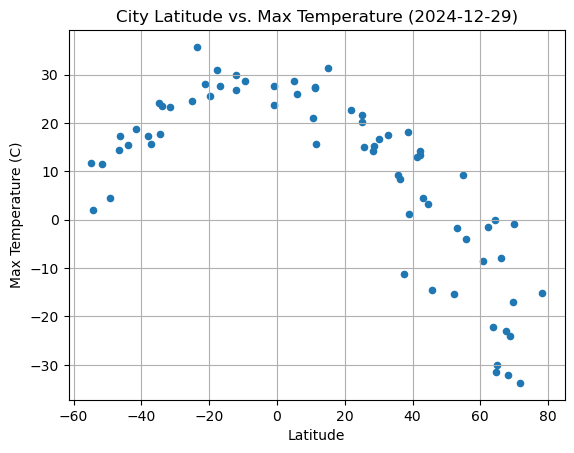

In [43]:
# Build scatter plot for latitude vs. temperature
cityData_df.plot(x = 'Lat', y = 'Max Temp', kind = 'scatter', 
        grid = True, xlabel = 'Latitude', ylabel = 'Max Temperature (C)',
        title = f'City Latitude vs. Max Temperature ({date_str()})')

# Save the figure
plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

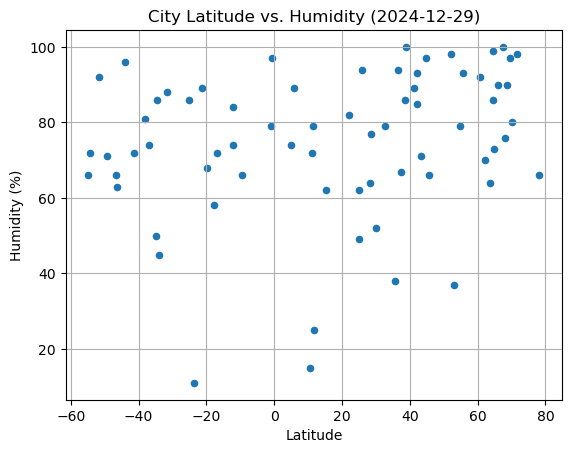

In [ ]:
# Build the scatter plots for latitude vs. humidity
cityData_df.plot(x = 'Lat', y = 'Humidity', kind = 'scatter', 
        grid = True, xlabel = 'Latitude', ylabel = 'Humidity (%)',
        title = f'City Latitude vs. Humidity ({date_str()})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

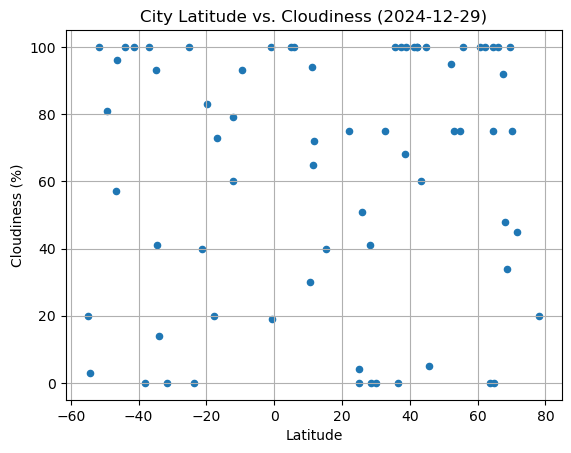

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cityData_df.plot(x = 'Lat', y = 'Cloudiness', kind = 'scatter', 
        grid = True, xlabel = 'Latitude', ylabel = 'Cloudiness (%)',
        title = f'City Latitude vs. Cloudiness ({date_str()})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

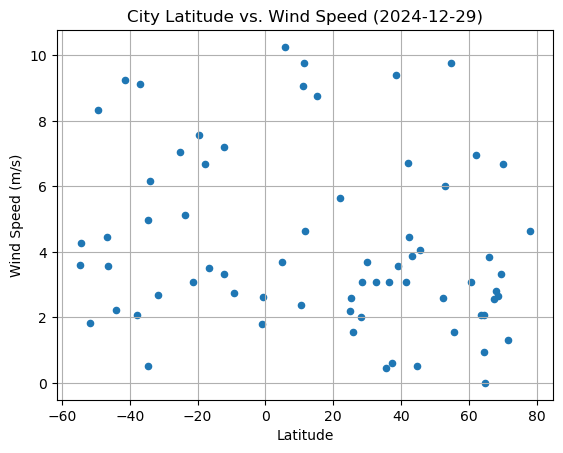

In [11]:
# Build the scatter plots for latitude vs. wind speed
cityData_df.plot(x = 'Lat', y = 'Wind Speed', kind = 'scatter', 
        grid = True, xlabel = 'Latitude', ylabel = 'Wind Speed (m/s)',
        title = f'City Latitude vs. Wind Speed ({date_str()})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE